In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import time
from math import pi

In [2]:
FIFA19_DATA = pd.read_csv('./data.csv')
csv_row_col = FIFA19_DATA.shape
print("The data.csv row size : %d" %(csv_row_col[0]))
print("The data.csv column size : %d" %(csv_row_col[1]))

The data.csv row size : 18207
The data.csv column size : 89


In [3]:
print("**** THE COLUMN ATTRIBUTES ****")
FIFA19_DATA.columns

**** THE COLUMN ATTRIBUTES ****


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
# Check the Missing value
FIFA19_DATA.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

  
  
***PREPARE DATA TO ANALYSIS
* Convert string values into numbers
* Create New columns which has numerical type wage info and value info
* Create New dataframe which has the columns we need to analysis

In [5]:
# Supporting function to convert string values into numbers
"""
FUNCTION NAME : str_to_number
PARAMETER :     column(str) : M-Million, K-Thousand
FUNCTION :      Convert from string to number and
                Returns the float number which represents the numerical value of the parameter
"""
def str_to_number(column):
    if column[-1] == 'M':
        return float(column[1:-1])*1000000
    elif column[-1] == 'K':
        return float(column[1:-1])*1000
    else:
        return float(column[1:])

In [6]:
# Create New Wage_ column to store numerical type Wage info
FIFA19_DATA['Wage_']  = FIFA19_DATA['Wage'].map(lambda x: str_to_number(x))

#Create New Value_ column to store numerical type Value info
FIFA19_DATA['Value_'] = FIFA19_DATA['Value'].map(lambda x: str_to_number(x))

In [7]:
# Prepare the data which has the column we needed
Dataset = FIFA19_DATA[["ID", "Name", "Age", "Position", "Preferred Foot", "Potential", "Nationality", "Club", "Wage_", "Value_"]]
Dataset.head(10)

,ID,Name,Age,Position,Preferred Foot,Potential,Nationality,Club,Wage_,Value_
0,158023,L. Messi,31,RF,Left,94,Argentina,FC Barcelona,565000.0,110500000.0
1,20801,Cristiano Ronaldo,33,ST,Right,94,Portugal,Juventus,405000.0,77000000.0
2,190871,Neymar Jr,26,LW,Right,93,Brazil,Paris Saint-Germain,290000.0,118500000.0
3,193080,De Gea,27,GK,Right,93,Spain,Manchester United,260000.0,72000000.0
4,192985,K. De Bruyne,27,RCM,Right,92,Belgium,Manchester City,355000.0,102000000.0
5,183277,E. Hazard,27,LF,Right,91,Belgium,Chelsea,340000.0,93000000.0
6,177003,L. Modrić,32,RCM,Right,91,Croatia,Real Madrid,420000.0,67000000.0
7,176580,L. Suárez,31,RS,Right,91,Uruguay,FC Barcelona,455000.0,80000000.0
8,155862,Sergio Ramos,32,RCB,Right,91,Spain,Real Madrid,380000.0,51000000.0
9,200389,J. Oblak,25,GK,Right,93,Slovenia,Atlético Madrid,94000.0,68000000.0


In [8]:
# Drop the rows which have the missing value and save it dataset
dataset = Dataset.dropna(how="any")
csv_row_col = dataset.shape
print("The dataset row size : %d" %(csv_row_col[0]))
print("The dataset column size : %d" %(csv_row_col[1]))
dataset.head(10)

The dataset row size : 17918
The dataset column size : 10


,ID,Name,Age,Position,Preferred Foot,Potential,Nationality,Club,Wage_,Value_
0,158023,L. Messi,31,RF,Left,94,Argentina,FC Barcelona,565000.0,110500000.0
1,20801,Cristiano Ronaldo,33,ST,Right,94,Portugal,Juventus,405000.0,77000000.0
2,190871,Neymar Jr,26,LW,Right,93,Brazil,Paris Saint-Germain,290000.0,118500000.0
3,193080,De Gea,27,GK,Right,93,Spain,Manchester United,260000.0,72000000.0
4,192985,K. De Bruyne,27,RCM,Right,92,Belgium,Manchester City,355000.0,102000000.0
5,183277,E. Hazard,27,LF,Right,91,Belgium,Chelsea,340000.0,93000000.0
6,177003,L. Modrić,32,RCM,Right,91,Croatia,Real Madrid,420000.0,67000000.0
7,176580,L. Suárez,31,RS,Right,91,Uruguay,FC Barcelona,455000.0,80000000.0
8,155862,Sergio Ramos,32,RCB,Right,91,Spain,Real Madrid,380000.0,51000000.0
9,200389,J. Oblak,25,GK,Right,93,Slovenia,Atlético Madrid,94000.0,68000000.0


Right    13756
Left      4162
Name: Preferred Foot, dtype: int64


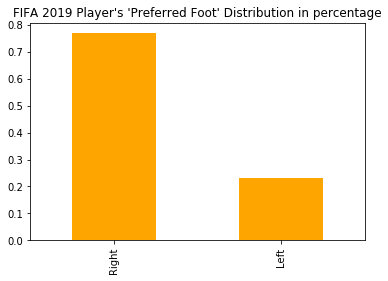

In [9]:
preferred_foot_vals = dataset['Preferred Foot'].value_counts()
print(preferred_foot_vals)

(preferred_foot_vals/dataset.shape[0]).plot(kind="bar",color='Orange');
plt.title("FIFA 2019 Player's 'Preferred Foot' Distribution in percentage");

ST     2130
GK     1992
CB     1754
CM     1377
LB     1305
RB     1268
RM     1114
LM     1086
CAM     948
CDM     936
RCB     652
LCB     637
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64


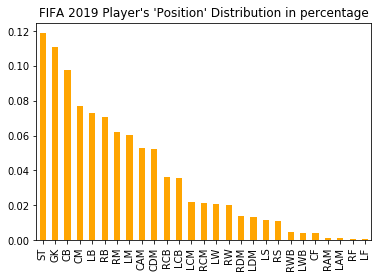

In [10]:
position_vals = dataset['Position'].value_counts()
print(position_vals)
(position_vals/dataset.shape[0]).plot(kind="bar",color='Orange');
plt.title("FIFA 2019 Player's 'Position' Distribution in percentage");

Right Foot Player's Position
ST     1840
GK     1787
CB     1416
RB     1254
CM     1130
RM      865
CDM     812
CAM     695
LM      680
RCB     620
LCB     375
RCM     346
LCM     292
RW      270
LW      269
RDM     223
LDM     190
LS      173
RS      164
LB      158
RWB      83
CF       56
RAM      12
LAM      12
LF       12
LWB      12
RF       10
Name: Position, dtype: int64
Left Foot Player's Position
LB     1147
LM      406
CB      338
ST      290
LCB     262
CAM     253
RM      249
CM      247
GK      205
CDM     124
LW      105
LCM      97
RW       95
LWB      66
LDM      49
RCM      41
RS       37
LS       33
RCB      32
RDM      23
CF       18
RB       14
LAM       9
RAM       9
RF        6
RWB       4
LF        3
Name: Position, dtype: int64


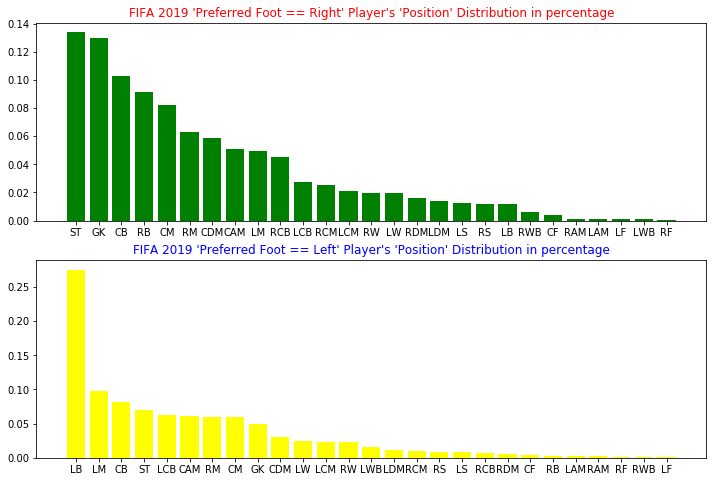

In [11]:
"""
Preferred Foot이 Left인 애들만 따로 뽑아와서 series 객체 하나 생성하고, 거기서 position들을 value_count해서 series객체 생성,
Right인 애들도 마찬가지. 그 후 두개를 합쳐서 하나의 데이터 프레임으로 만들어줘
"""
# RIGHT FOOT PLAYER'S POSITION DISTRIBUTION #
right_foot = dataset[dataset['Preferred Foot'] == 'Right']
rightfoot_posi_vals = right_foot['Position'].value_counts()
print("Right Foot Player's Position")
print(rightfoot_posi_vals)

# LEFT FOOT PLAYER'S POSITION DISTRIBUTION #
left_foot = dataset[dataset['Preferred Foot'] == 'Left']
leftfoot_posi_vals = left_foot['Position'].value_counts()
print("Left Foot Player's Position")
print(leftfoot_posi_vals)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(rightfoot_posi_vals.index, rightfoot_posi_vals.values / right_foot.shape[0], color="Green")
plt.title("FIFA 2019 'Preferred Foot == Right' Player's 'Position' Distribution in percentage", color="Red");

ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(leftfoot_posi_vals.index, leftfoot_posi_vals.values / left_foot.shape[0], color="Yellow")
plt.title("FIFA 2019 'Preferred Foot == Left' Player's 'Position' Distribution in percentage",color="Blue");


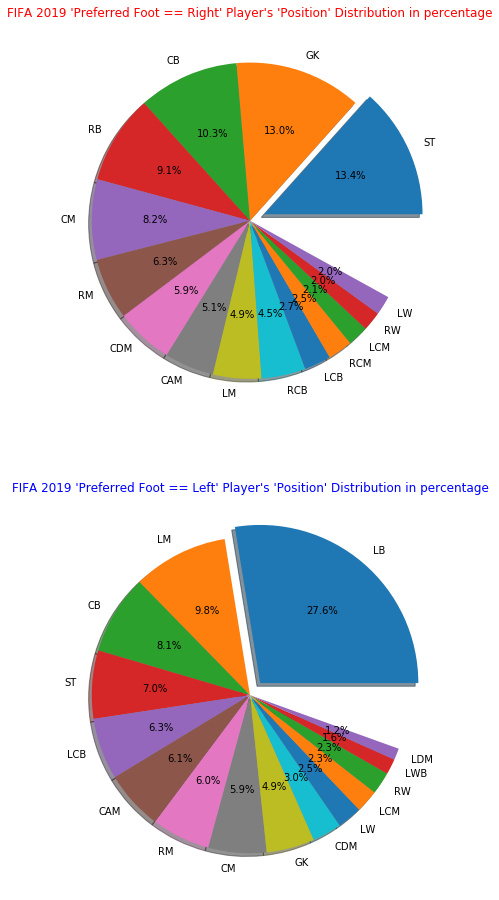

In [12]:
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fig = plt.figure(figsize=(18,16))
ax1 = fig.add_subplot(2, 1, 1)
ax1.pie(rightfoot_posi_vals.head(15).values / right_foot.shape[0],
        labels = rightfoot_posi_vals.head(15).index,
        explode = myexplode,
        shadow = True,
        autopct='%1.1f%%',
        )
        
        
plt.title("FIFA 2019 'Preferred Foot == Right' Player's 'Position' Distribution in percentage", color="Red");

ax2 = fig.add_subplot(2, 1, 2)
ax2.pie(leftfoot_posi_vals.head(15).values / left_foot.shape[0],
        labels = leftfoot_posi_vals.head(15).index,
        explode = myexplode,
        shadow = True,
        autopct='%1.1f%%')
plt.title("FIFA 2019 'Preferred Foot == Left' Player's 'Position' Distribution in percentage", color="Blue");


        Right      Left
CAM  0.050523  0.060788
CB   0.102937  0.081211
CDM  0.059029  0.029793
CF   0.004071  0.004325
CM   0.082146  0.059346
GK   0.129907  0.049255
LAM  0.000872  0.002162
LB   0.011486  0.275589
LCB  0.027261  0.062951
LCM  0.021227  0.023306
LDM  0.013812  0.011773
LF   0.000872  0.000721
LM   0.049433  0.097549
LS   0.012576  0.007929
LW   0.019555  0.025228
LWB  0.000872  0.015858
RAM  0.000872  0.002162
RB   0.091160  0.003364
RCB  0.045071  0.007689
RCM  0.025153  0.009851
RDM  0.016211  0.005526
RF   0.000727  0.001442
RM   0.062882  0.059827
RS   0.011922  0.008890
RW   0.019628  0.022826
RWB  0.006034  0.000961
ST   0.133760  0.069678


Text(0.5, 1.0, 'FIFA 2019 DISTRIBUTION ABOUT POSITION AND PREFERRED FOOT')

<Figure size 864x576 with 0 Axes>

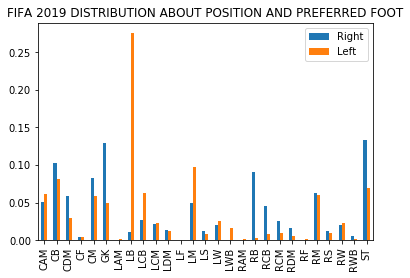

In [13]:
rightfoot_posi_vals = right_foot['Position'].value_counts()
leftfoot_posi_vals = left_foot['Position'].value_counts()
rightfoot_dist = rightfoot_posi_vals / right_foot.shape[0]
leftfoot_dist = leftfoot_posi_vals / left_foot.shape[0]
df = pd.DataFrame({'Right':rightfoot_dist, 'Left':leftfoot_dist})

print(df)

plt.figure(figsize=(12,8))
df.plot(kind = "bar")
plt.title("FIFA 2019 DISTRIBUTION ABOUT POSITION AND PREFERRED FOOT")

21    1412
26    1348
24    1334
23    1313
22    1312
25    1295
20    1229
27    1145
28    1077
19    1017
29     940
30     902
18     729
31     694
32     564
Name: Age, dtype: int64


Text(0.5, 1.0, "FIFA 2019 Player's Age Distribution in percentage")

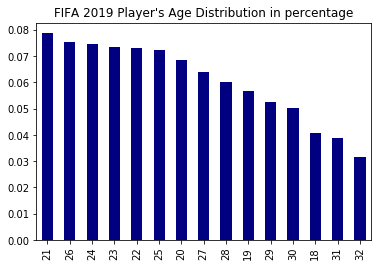

In [14]:
# Age Distribution
age_vals = dataset.Age.value_counts()
print(age_vals.head(15))

(age_vals.head(15)/dataset.shape[0]).plot(kind="bar",color='navy')
plt.title("FIFA 2019 Player's Age Distribution in percentage")

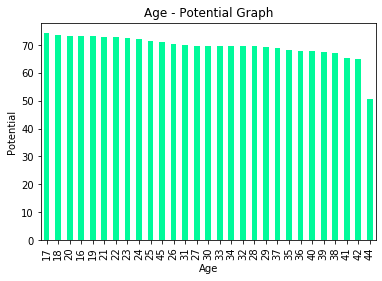

In [15]:
# Age- Potential
dataset.groupby("Age")["Potential"].mean().sort_values(ascending=False).plot(kind="bar",color='mediumspringgreen');
plt.ylabel("Potential")
plt.title("Age - Potential Graph");

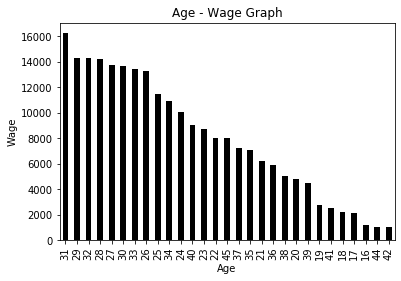

In [16]:
# Age- Wage
dataset.groupby("Age")["Wage_"].mean().sort_values(ascending=False).plot(kind="bar",color='black');
plt.ylabel("Wage")
plt.title("Age - Wage Graph");

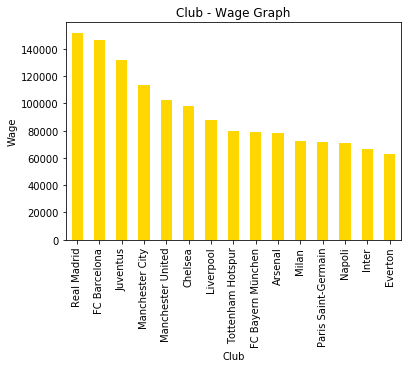

In [17]:
# Club - Wage
dataset.groupby("Club")["Wage_"].mean().sort_values(ascending=False).head(15).plot(kind="bar",color='gold');
plt.ylabel("Wage")
plt.title("Club - Wage Graph");

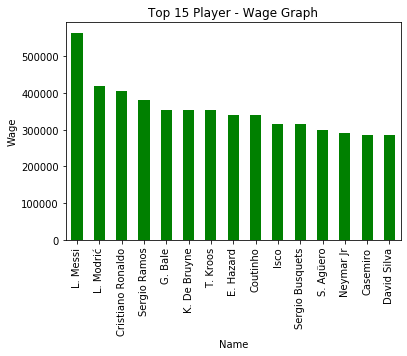

In [18]:
# Player - Wage
dataset.groupby("Name")["Wage_"].mean().sort_values(ascending=False).head(15).plot(kind="bar",color='green');
plt.ylabel("Wage")
plt.title("Top 15 Player - Wage Graph");

England                1657
Germany                1195
Spain                  1071
Argentina               935
France                  911
Brazil                  825
Italy                   699
Colombia                616
Japan                   478
Netherlands             452
Sweden                  394
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  347
Norway                  341
Saudi Arabia            337
Denmark                 335
Name: Nationality, dtype: int64


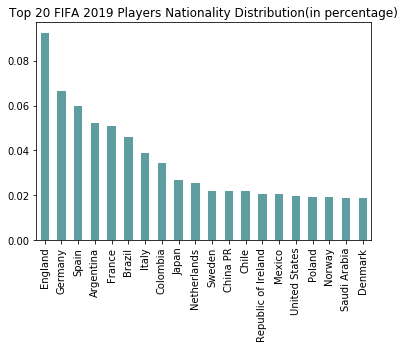

In [19]:
# Here i'm listing the top 20 Nations with highest number of players
country_player_vals = dataset.Nationality.value_counts()
print(country_player_vals.head(20))

(country_player_vals.head(20)/dataset.shape[0]).plot(kind="bar",color='cadetblue');

plt.title("Top 20 FIFA 2019 Players Nationality Distribution(in percentage)");

In [20]:
def bar_graph(attribute):
    attribute_vals = dataset[attribute].value_counts().sort_values(ascending=False)
    #print(attribute_vals.head(20))
    plt.figure(figsize = (6,4))
    (attribute_vals.head(20)/dataset.shape[0]).plot(kind="bar",color='lawngreen');
    plt.title("Bar Graph %s - Distribution" %(attribute));

In [21]:
def pie_graph(attribute):
    attribute_vals = dataset[attribute].value_counts().sort_values(ascending=False)
    myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    if attribute == "Preferred Foot":
        plt.figure(figsize = (9,6))
        #plt.pie(attribute_vals.head(20)/dataset.shape[0], labels = attribute_vals.head(20).index)
        plt.pie(attribute_vals/attribute_vals.values.sum(),
        labels = attribute_vals.index,
        autopct='%1.1f%%',
        explode = [0.1, 0],
        shadow = True)
        plt.title("Pie Graph - %s Distribution" %(attribute));
        plt.show()
        return
    
    plt.figure(figsize = (9,6))
    #plt.pie(attribute_vals.head(20)/dataset.shape[0], labels = attribute_vals.head(20).index)
    plt.pie(attribute_vals.head(20)/attribute_vals.head(20).values.sum(),
            labels = attribute_vals.head(20).index,
            autopct='%1.1f%%',
            explode = myexplode,
            shadow = True)
    plt.title("Pie Graph - %s Distribution" %(attribute));
    plt.show()

In [22]:
def playerinfo(name1, name2):
    d = FIFA19_DATA[['Name','Wage_','Crossing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'LongPassing', 'Acceleration', 'SprintSpeed', 'ShotPower', 'Stamina']]
    d2 = d.sort_values(["Wage_"], ascending=False)
    #data = d2.head(20)
    data = d2
    df = pd.DataFrame({
        'group': [name1, name2],
        'Crossing': [data[data['Name'] == name1].Crossing.values[0], data[data['Name'] == name2].Crossing.values[0]],
        'HeadingAccuracy': [data[data['Name'] == name1].HeadingAccuracy.values[0], data[data['Name'] == name2].HeadingAccuracy.values[0]],
        'ShortPassing': [data[data['Name'] == name1].ShortPassing.values[0],data[data['Name'] == name2].ShortPassing.values[0]],
        'Dribbling': [data[data['Name'] == name1].Dribbling.values[0], data[data['Name'] == name2].Dribbling.values[0]],
        'LongPassing': [data[data['Name'] == name1].LongPassing.values[0], data[data['Name'] == name2].LongPassing.values[0]],
        'Acceleration': [data[data['Name'] == name1].Acceleration.values[0], data[data['Name'] == name2].Acceleration.values[0]],
        'SprintSpeed': [data[data['Name'] == name1].SprintSpeed.values[0], data[data['Name'] == name2].SprintSpeed.values[0]],
        'ShotPower': [data[data['Name'] == name1].ShotPower.values[0], data[data['Name'] == name2].ShotPower.values[0]],
        'Stamina': [data[data['Name'] == name1].Stamina.values[0], data[data['Name'] == name2].Stamina.values[0]],
    })

    # ---- PART 1: Create background
    plt.figure(figsize = (10,8))
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
    print(N)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,40,50,60,70,80,90], ["30","40","50","60","70","80","90"], color="grey", size=8)
    plt.ylim(0,100)


    # ---- PART 2: Add plots

    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=name1)
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=name2)
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('%s vs %s' %(name1, name2), color = 'green')

In [29]:
class WrongColumnName(Exception):
    def __init__(self, msg):
        self._message = msg

class WrongPlayerName(Exception):
    def __init__(self, msg):
        self._message = msg
        
def checkTime(func):
    def newFunc(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        print("\nProgram Execution Time : ", end - start, "sec")

    return newFunc  

In [30]:
@checkTime
def main():
    print("COLUMN LIST")
    dataset = FIFA19_DATA[["Name", "Age", "Position", "Preferred Foot", "Potential", "Nationality", "Club", "Wage_", "Value_"]]
    for column in dataset.columns:
        print('"'+column+'"' , end=' ')
    print('\n\n')
    col_name = input("Enter the name of the column you want to check : ")
    if col_name not in dataset.columns:
        raise WrongColumnName("입력한 Column 이름은 존재하지 않습니다")
        
    # 해당 column에 대해 bar 그래프 출력해주는 함수 호출
    bar_graph(col_name)
    # 해당 column에 대해 pie 그래프 출력해주는 함수 호출
    pie_graph(col_name)
    
    data = dataset.sort_values(["Wage_"], ascending=False)
    
    print("'Wage TOP20 Player' Name List")
    for name in data.head(20).Name.values:
        print(name)
        
    id1 = input("input the first player ID  : ")
    if id1 not in data.head(20).Name.values:
        raise WrongPlayerName("입력한 선수 이름이 존재하지 않습니다.")
    id2 = input("input the second player ID  : ")
    if id2 not in data.head(20).Name.values:
        raise WrongPlayerName("입력한 선수 이름이 존재하지 않습니다.")
    
    playerinfo(id1,id2)
    
    playerinfo('H. Son', 'L. Messi')

 사용자로부터 정보를 확인하고 싶은 column들에 대한 입력을 받는다.  
 해당 column이 유효한 column인지에 대한 "예외처리"를 추가해준다.  
 만약 유효한 column이라면 그에 맞는 정보를 시각화 하여 출력해주고,   
 유효하지 않은 column이라면 적절한 예외처리를 통해 handling 해준다.  

COLUMN LIST
"Name" "Age" "Position" "Preferred Foot" "Potential" "Nationality" "Club" "Wage_" "Value_" 


Enter the name of the column you want to check : Age


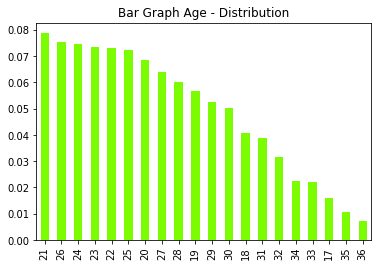

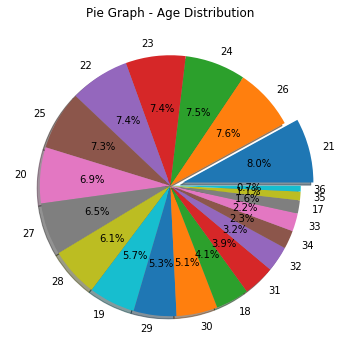

'Wage TOP20 Player' Name List
L. Messi
L. Suárez
L. Modrić
Cristiano Ronaldo
Sergio Ramos
T. Kroos
G. Bale
K. De Bruyne
E. Hazard
Coutinho
Isco
J. Rodríguez
Sergio Busquets
S. Agüero
Neymar Jr
David Silva
Casemiro
Marcelo
P. Aubameyang
I. Rakitić
input the first player ID  : L. Messi
input the second player ID  : Cristiano Ronaldo
9
9

Program Execution Time :  17.430312871932983 sec


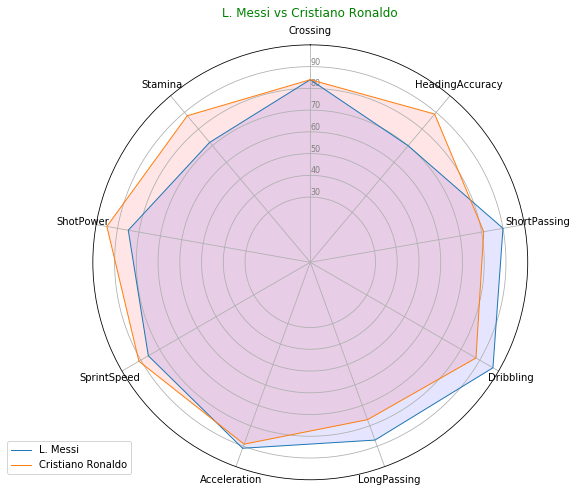

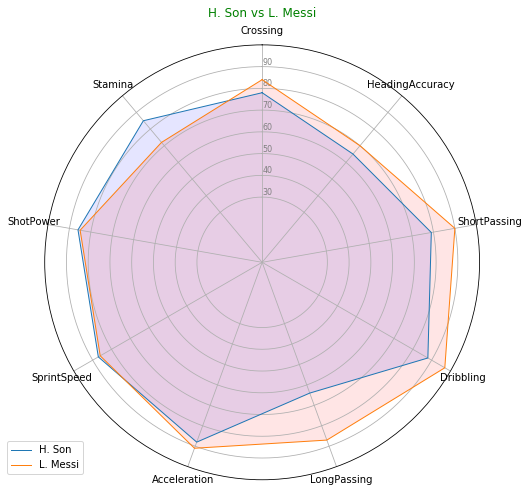

In [32]:
if __name__ == "__main__":
    try:
        main()
    except WrongColumnName as e:
        print(e.args[0])
        flag = 1
    except WrongPlayerName as e2:
        print(e2.args[0])